<a href="https://colab.research.google.com/github/atehe/DSN-AI-2021-HACKATHON/blob/main/Copy_of_BOOTCAMP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'http://syllabus.africacode.net/projects/data-science-specific/bootcamp-exploratory-data-analysis/data.csv'
df = pd.read_csv(url)
df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


#### **DATA PREPROCESSING**

In [ ]:
print('Number of null values in each column:'.upper())
df.isna().sum()

NUMBER OF NULL VALUES IN EACH COLUMN:


Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

In [ ]:
print('Rows containing null values:', df[df.isna().any(axis=1)].shape)

Rows containing null values: (144, 13)


In [ ]:
print('Shape of dataset is:', df.shape)

Shape of dataset is: (194, 13)


1.   **Over 60% of rows in the dataset contain null values**
- **Replacing the null values with mean of their group by region:**

In [ ]:
for col in df.columns:
    if df[col].isna().sum():
        df.replace(np.nan, df[col].mean(),inplace=True)

In [ ]:
df.isna().sum()

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64

In [ ]:
print('COLUMNS DATATYPE:')
df.dtypes

COLUMNS DATATYPE:


Country                           object
Region                            object
Population                         int64
Under15                          float64
Over60                           float64
FertilityRate                    float64
LifeExpectancy                     int64
ChildMortality                   float64
CellularSubscribers              float64
LiteracyRate                     float64
GNI                              float64
PrimarySchoolEnrollmentMale      float64
PrimarySchoolEnrollmentFemale    float64
dtype: object

#### **EXPLORATORY DATA ANALYIS**

In [ ]:
for col in df.columns:
    if df[col].dtypes == 'O':
        print(f'{col.upper()} VALUES AND COUNT')
        print('------'*5)
        print(df[col].value_counts())
        print('------'*5)

COUNTRY VALUES AND COUNT
------------------------------
Republic of Moldova                 1
Italy                               1
Malaysia                            1
Burkina Faso                        1
Rwanda                              1
                                   ..
Armenia                             1
Bulgaria                            1
Democratic Republic of the Congo    1
Honduras                            1
Botswana                            1
Name: Country, Length: 194, dtype: int64
------------------------------
REGION VALUES AND COUNT
------------------------------
Europe                   53
Africa                   46
Americas                 35
Western Pacific          27
Eastern Mediterranean    22
South-East Asia          11
Name: Region, dtype: int64
------------------------------


In [ ]:
print('% OF POPULATION UNDER I5 FOR EACH COUNTRY:')
df.groupby('Country')['Under15'].mean().sort_values().to_frame()

% OF POPULATION UNDER I5 FOR EACH COUNTRY:


,Under15
Country,
Japan,13.12
Germany,13.17
Qatar,13.28
Bulgaria,13.53
Italy,14.04
...,...
Afghanistan,47.42
Angola,47.58
Chad,48.52


3. **Japan has the lowest percentage of population under 15 while Niger has the higest, with almost 50% of its population being under 15**

% OF POPULATION OVER 60 FOR EACH REGION: 

Region
Europe                   20.218107
Western Pacific          14.079193
Americas                 13.657760
South-East Asia           8.282772
Eastern Mediterranean     6.412040
Africa                    4.954125
Name: Perc_over_60, dtype: float64 



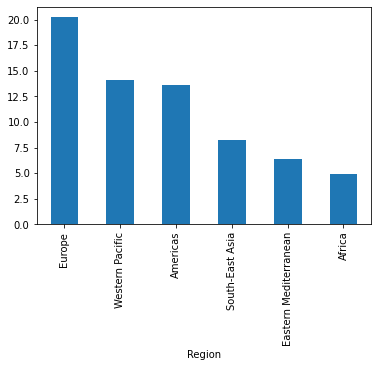

In [ ]:
df['Pop_over_60'] = (df['Over60'] / 100) * df['Population']

df_over_60 = df.groupby('Region')[['Pop_over_60','Population']].sum()
df_over_60['Perc_over_60'] = (df_over_60['Pop_over_60'] / df_over_60['Population']) * 100

print('% OF POPULATION OVER 60 FOR EACH REGION: \n')
print(df_over_60['Perc_over_60'].sort_values(ascending=False), '\n')
df_over_60['Perc_over_60'].sort_values(ascending=False).plot.bar()

4. **Europe has the largest percentage of population of people over 60 years**

REGRESSION PLOT OF FERTILITY RATE AND INCOME


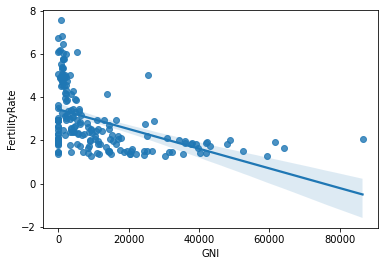

In [ ]:
print('REGRESSION PLOT OF FERTILITY RATE AND INCOME')
sns.regplot(y='FertilityRate', x='GNI', data=df, )

5. **As shown by the regplot**
- Fertility decreases as income increases with some outliers (countries that do not follow the relation)

 **The outliers are shown below:**

In [ ]:
print('COUNTRIES THAT DO NOT FOLLOW THE RELATION BETWEEN FERTILTY RATE AND INCOME:')
df[(df['GNI']>10000)&(df['FertilityRate']>4)]

COUNTRIES THAT DO NOT FOLLOW THE RELATION BETWEEN FERTILTY RATE AND INCOME:


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale,Pop_over_60
55,Equatorial Guinea,Africa,736,38.95,4.53,5.04,54,100.3,59.15,93.9,25620.0,56.500000,56.000000,33.3408
62,Gabon,Africa,1633,38.49,7.38,4.18,62,62.0,117.32,88.4,13740.0,2.940656,2.940656,120.5154


Region
Africa                   45.497919
Americas                 31.003831
Eastern Mediterranean    31.732164
Europe                   54.638685
South-East Asia          11.957944
Western Pacific          78.122969
Name: literacy_perc, dtype: float64


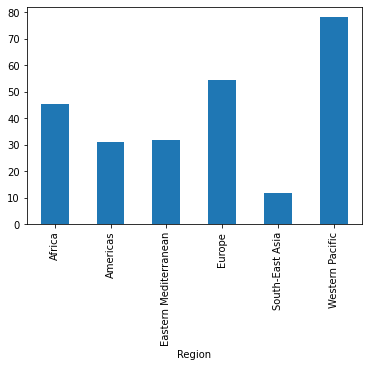

In [ ]:
df['literacy_pop'] = (df['LiteracyRate'] / 100) * df['Population']

df_over_60 = df.groupby('Region')[['literacy_pop','Population']].sum()
df_over_60['literacy_perc'] = (df_over_60['literacy_pop'] / df_over_60['Population']) * 100

print(df_over_60['literacy_perc'])
df_over_60['literacy_perc'].plot.bar()

6. **South-East Asia region has the lowest literacy rates**

Region
Europe                   10.050943
Americas                 19.322857
Western Pacific          24.711111
South-East Asia          35.045455
Eastern Mediterranean    40.250000
Africa                   84.036957
Name: ChildMortality, dtype: float64

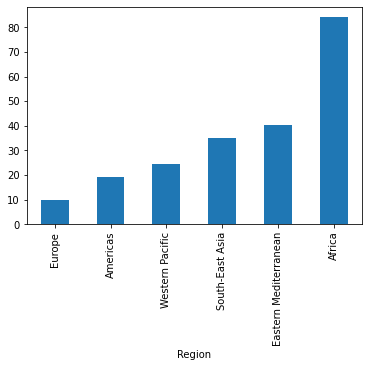

In [ ]:
df.groupby('Region')['ChildMortality'].mean().sort_values().plot.bar()
df.groupby('Region')['ChildMortality'].mean().sort_values()

7. **Europe has the lowest child mortality rate with a average of 10 deaths (within the first 5yrs) per 1000 births**

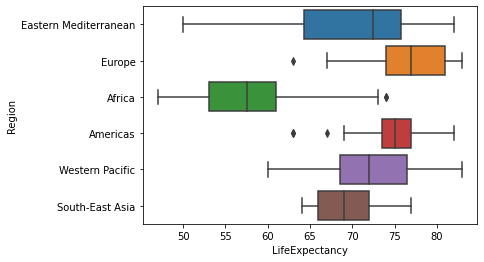

In [ ]:
sns.boxplot(x='LifeExpectancy', y='Region', data=df)

8.
**From the boxplot:**
- Africa has the least average life expectancy with a maximum Life expectancy of about 75yrs.
- Eastern Mediterranean has a high average life expectancy but some countries with low life expectancy below 55yrs.
-The country with the most life expectancy is in Europe, furthermore Europe has the highest average life expectancy.
-Most American countries have life expectancy above 68yrs

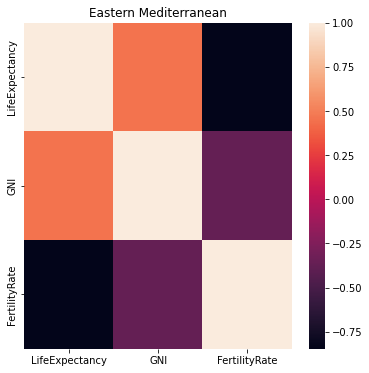

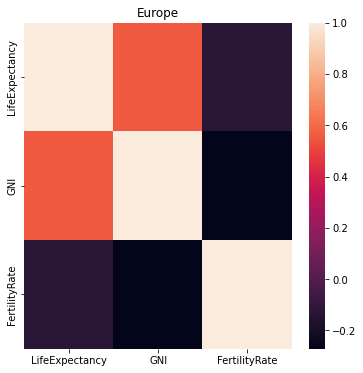

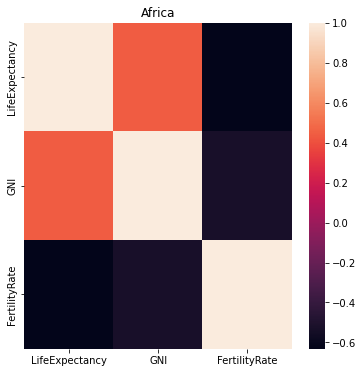

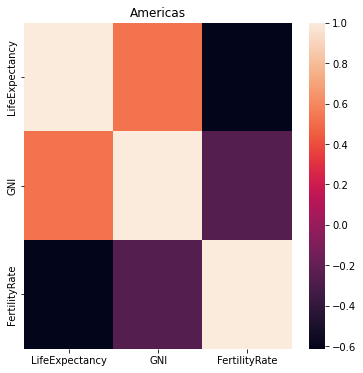

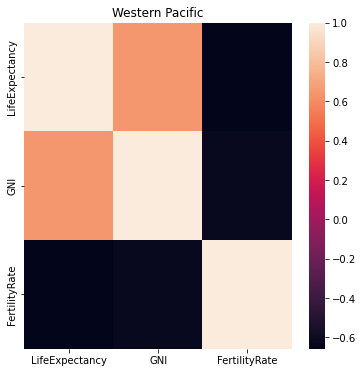

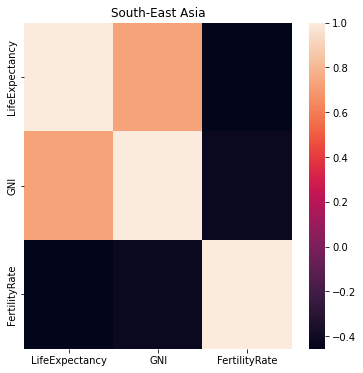

In [ ]:
for region in df['Region']. unique():
    region_df = df[df['Region'] == region]
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    sns.heatmap(region_df[['LifeExpectancy','GNI','FertilityRate']].corr())
    ax.set_title(region)
    plt.show()

9.
**From the heatmaps:**
- Life expectancy has a positive correlation with wealth (increases as wealth increases)  across the different regions, Africa also has the least positive correlation while Western Pacific has the highest correlation
- Wealth has a negative correlation with fertility rate (Fertility rate increases with wealth decrease and vice versa). Africa also follow this relationship

Region
South-East Asia           764.830000
Western Pacific          1887.733279
Eastern Mediterranean    2085.200656
Africa                   2898.830000
Americas                 3644.561311
Europe                   5978.291311
Name: CellularSubscribers, dtype: float64

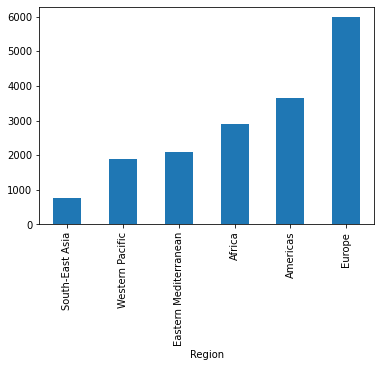

In [ ]:
df.groupby('Region')['CellularSubscribers'].sum().sort_values().plot.bar()
df.groupby('Region')['CellularSubscribers'].sum().sort_values()

- **Europe has the most cellular subscribers and South-East Asia with the least**

,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
Region,,
Africa,1871.335082,1774.835082
Americas,1996.869180,1988.869180
Eastern Mediterranean,590.550492,560.750492
Europe,3684.109836,3691.909836
South-East Asia,385.484590,388.584590
Western Pacific,921.031803,921.431803


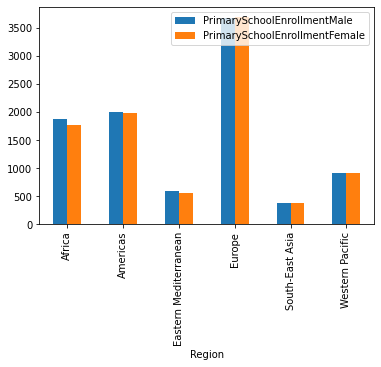

In [ ]:
df.groupby('Region')[['PrimarySchoolEnrollmentMale','PrimarySchoolEnrollmentFemale']].sum().plot.bar()
df.groupby('Region')[['PrimarySchoolEnrollmentMale','PrimarySchoolEnrollmentFemale']].sum()

- **Africa has more primary school enrollment for male than female**
- **Europe has the highest number of Primary school enrollment**